# $k$-NN's: $k$-Nearest Neighbours

#### *variationalform* <https://variationalform.github.io/>

#### *Just Enough: progress at pace*

<https://variationalform.github.io/>

<https://github.com/variationalform>

<https://www.brunel.ac.uk/people/simon-shaw>.


<table>
<tr>
<td>
<img src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1" style="height:18px"/>
<img src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1" style="height:18px"/>
<img src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1" style="height:18px"/>
</td>
<td>

<p>
This work is licensed under CC BY-SA 4.0 (Attribution-ShareAlike 4.0 International)

<p>
Visit <a href="http://creativecommons.org/licenses/by-sa/4.0/">http://creativecommons.org/licenses/by-sa/4.0/</a> to see the terms.
</td>
</tr>
</table>

<table>
<tr>
<td>This document uses</td>
<td>
<img src="https://www.python.org/static/community_logos/python-logo-master-v3-TM.png" style="height:30px"/>
</td>
<td>and also makes use of LaTeX </td>
<td>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/92/LaTeX_logo.svg/320px-LaTeX_logo.svg.png" style="height:30px"/>
</td>
<td>in Markdown</td> 
<td>
<img src="https://github.com/adam-p/markdown-here/raw/master/src/common/images/icon48.png" style="height:30px"/>
</td>
</tr>
</table>

# Penguins: An Example Data Set

Bring in our standard imports and then look at the data sets available in seaborn. We'll be using the 
*penguins* data.

<table>
<tr>
<td>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/35/Tux.svg/202px-Tux.svg.png" style="height:50px"/>
</td>
</tr>
</table>




In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import seaborn as sns
import time

In [2]:
# https://blog.enterprisedna.co/how-to-load-sample-datasets-in-python/
sns.get_dataset_names()
# https://github.com/mwaskom/seaborn-data

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

## Some Data-Engineering

There are a lot of data sets here that can be used to demonstrate various aspects of, and 
techniques in, machine learning and Data Science, and we'll look at a few of them as go on.

To start with though we'll be working with the penguins data set. Before we do any machine
learning we are going to have to do some **data cleaning**, see e.g.
<https://en.wikipedia.org/wiki/Data_cleansing>, to remove some 
un-defined values.

This shouldn't be confused with
<https://en.wikipedia.org/wiki/Feature_engineering>.

Let's grab the penguins data and see what is in it. We load it into a data frame called `dfp`, as in *data frame for penguins*. And let's look at the head of the table - the first few rows.

In [3]:
dfp = sns.load_dataset('penguins')
dfp.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [4]:
num_rows, num_columns = dfp.shape
print('number of data points (or observations) = ', num_rows)
print('number of features (or measurement) = ', num_columns)

number of data points (or observations) =  344
number of features (or measurement) =  7


So, the data set contains 344 rows and seven columns. Each row corresponds to a single penguin,
and for each row each column corresponds to a feature of that penguin. We can see its species,
the island it was found on, its bill length, bill depth, and flipper length - all in millimetres,
its body mass in grams, and its gender.

We can also see `NaN` values in row 3. That's the fourth row - be careful of this, indexing starts
at zero. This stands for *Not a Number* and means that we can't use those values as they stand.
We don't know why they are there - paerhaps the data got corrupted. It's a fact of life though
that data sets are often a bit messy with wrong, missing or corrupted values. We'll see a
couple of ways to deal with these instances below.

We haven't listed every row - just the `head` of the data table. Another way to visualize these 
data is to use a scatter plot.

See e.g. <https://seaborn.pydata.org/generated/seaborn.scatterplot.html>

<AxesSubplot:xlabel='body_mass_g', ylabel='bill_depth_mm'>

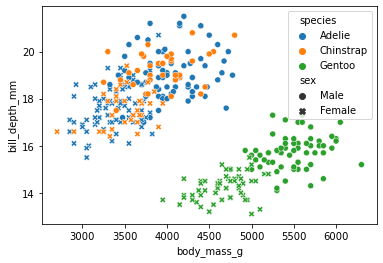

In [5]:
sns.scatterplot(data=dfp, x="body_mass_g", y="bill_depth_mm", hue="species", style="sex")

If that looks a little cramped you can control the size like this:

<AxesSubplot:xlabel='body_mass_g', ylabel='bill_depth_mm'>

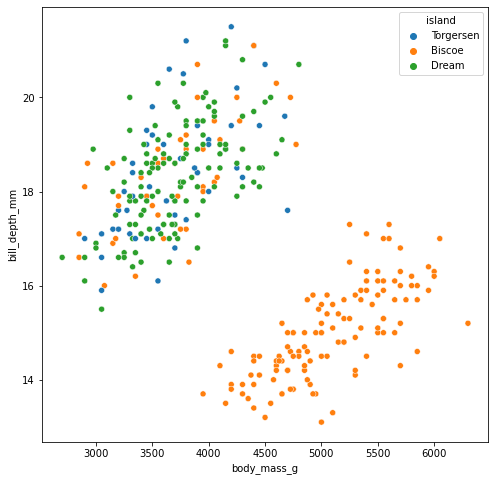

In [6]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data=dfp, x="body_mass_g", y="bill_depth_mm", hue="island")

When we issued the command `dfp.head()` above we got to see the top of the table. We can also 
see the bottom like this:

In [7]:
dfp.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,Male


This has given us two species, *Adelie* and *Gentoo*, but from the plots
above we know there is also a third: *Chinstrap*.

We can also see from the *head* and *tail* functions that there are two islands,
*Torgersen* and *Biscoe*, and that - from the plots - there is a third,
*Dream*. 

How could we find these without having to plot the data? Well, we could look
at the whole table like this, but it's a bit messy
(and what if we had millions of rows?).

In [8]:
print(dfp.to_string())

       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g     sex
0       Adelie  Torgersen            39.1           18.7              181.0       3750.0    Male
1       Adelie  Torgersen            39.5           17.4              186.0       3800.0  Female
2       Adelie  Torgersen            40.3           18.0              195.0       3250.0  Female
3       Adelie  Torgersen             NaN            NaN                NaN          NaN     NaN
4       Adelie  Torgersen            36.7           19.3              193.0       3450.0  Female
5       Adelie  Torgersen            39.3           20.6              190.0       3650.0    Male
6       Adelie  Torgersen            38.9           17.8              181.0       3625.0  Female
7       Adelie  Torgersen            39.2           19.6              195.0       4675.0    Male
8       Adelie  Torgersen            34.1           18.1              193.0       3475.0     NaN
9       Adelie  Torgersen     

A simpler way is to ask for all the unique entries in the *species* column, and  
in the *island* column:

In [9]:
dfp.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [10]:
dfp.island.unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

## Summary

We have seen that three species are documented on three Antarctic islands.

We have also seen that some values are undefined: `NaN` stands for 
*Not a Number*. This may indicate that the data was not captured reliably.

We can see how many rows contain have undefined values like this:

In [11]:
dfp.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

There are at least eleven. Let's find them. In the following `axis=1` tells python
that we want to find **rows** with `NaN` in.

In [12]:
dfp[dfp.isna().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


We can get a list of the row index numbers like this:

In [13]:
NaN_rows = dfp[dfp.isna().any(axis=1)]
print(NaN_rows.index)

Int64Index([3, 8, 9, 10, 11, 47, 246, 286, 324, 336, 339], dtype='int64')


And we can use these as an alternative to the `axis=1` command above:

In [14]:
dfp.loc[NaN_rows.index]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


### Data Engineering - our first method

One way to deal with missing values like this is to simply fill them
with 'reasonable' values. For example, we can replace the numerical
values with the mean, or average, of that feature, and replace

categorical values with just one of the possible categories.

For example, let's use the mean for numerical values and treat all 
missing genders as *Female*.

In [15]:
# from https://datagy.io/pandas-fillna/
dfp1 = dfp.fillna({'bill_length_mm'   : dfp['bill_length_mm'].mean(),
                   'bill_depth_mm'    : dfp['bill_depth_mm'].mean(),
                   'flipper_length_mm': dfp['flipper_length_mm'].mean(),
                   'body_mass_g'      : dfp['body_mass_g'].mean(),
                   'sex': 'Female'})

We can compare the old and new data frames just to check this worked as
expected.

In [16]:
# Here is the new one with the NaN's replaced - or engineered out
dfp1.loc[NaN_rows.index]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,Female
8,Adelie,Torgersen,34.10000,18.10000,193.000000,3475.000000,Female
9,Adelie,Torgersen,42.00000,20.20000,190.000000,4250.000000,Female
10,Adelie,Torgersen,37.80000,17.10000,186.000000,3300.000000,Female
11,Adelie,Torgersen,37.80000,17.30000,180.000000,3700.000000,Female
47,Adelie,Dream,37.50000,18.90000,179.000000,2975.000000,Female
246,Gentoo,Biscoe,44.50000,14.30000,216.000000,4100.000000,Female
286,Gentoo,Biscoe,46.20000,14.40000,214.000000,4650.000000,Female
324,Gentoo,Biscoe,47.30000,13.80000,216.000000,4725.000000,Female
336,Gentoo,Biscoe,44.50000,15.70000,217.000000,4875.000000,Female


In [17]:
# Here is the old one with the NaN's
dfp.loc[NaN_rows.index]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


It is always good practice to check your work. This can be challenging when
dealing with large data sets because you can't keep printing them out and
checking every item to make sure that no errors have been introduced.

One way to make sure that these commands didn't do something unexpected
behind the scenes is just to plot each data set and make sure they look
the same.

For example:

<AxesSubplot:xlabel='body_mass_g', ylabel='bill_depth_mm'>

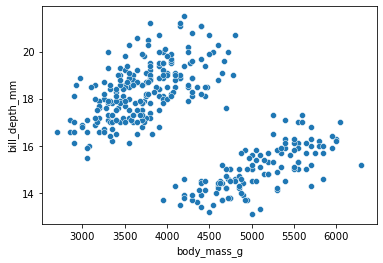

In [18]:
sns.scatterplot(data=dfp, x="body_mass_g", y="bill_depth_mm")

<AxesSubplot:xlabel='body_mass_g', ylabel='bill_depth_mm'>

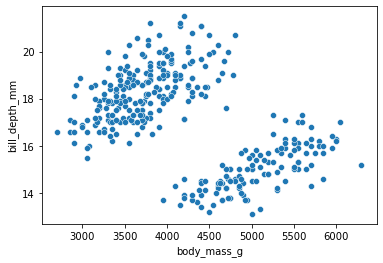

In [19]:
sns.scatterplot(data=dfp1, x="body_mass_g", y="bill_depth_mm")

Alternatively, the `describe()` function prints summary statistics. These should
be the same for each.

Below we see how this works. What do you think? Is everything OK with our data set?

Can you explain the differences? 

In [20]:
dfp.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [21]:
dfp1.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,344.000000,344.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.443643,1.969027,14.020657,799.613058
min,32.100000,13.100000,172.000000,2700.000000
25%,39.275000,15.600000,190.000000,3550.000000
50%,44.250000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


### Data Engineering - our second method

In the method above we just replaced missing values with *nearby* ones.

On the other hand, if we have a lot of data and are able to live with
a little less of it then we can just drop the data items that have 
undefined values.

For example: let's recall the rows with `NaN` entries and then total up
how many there are in each column, and in total:

In [22]:
dfp.loc[NaN_rows.index]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [23]:
dfp.isna().sum(axis=0)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

We could have written `dfp.isna().sum(axis=0)` to insist that we are counting
down columns here, but that's the default so the `axis=0` isn't needed.

We can see that there are no more that two `NaN` values in the third to sixth
columns, but eleven in the last, the seventh, column.

**NOTE**: the digit in the left most column is just the index of the column - it
is not considered part of the data set.

So, given that we have 344 data points (penguins), it looks like we can afford to drop these
bad data rows from the set. We can do it like this:

In [24]:
dfp2 = dfp.dropna()

Let's compare...

In [25]:
dfp

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [26]:
dfp2

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


It looks fine - the `NaN` values have disappeared from the newly 
engineered dataset. We can check, as above, by counting how many 
`NaN`'s are found in the new data set:

In [27]:
dfp2.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

On the other hand, the index values in the left most column are off. There is
no **3** for example. We can reset them with the `reset_index()` function but
we have to make sure we drop the original indices otherwise they will persist.

In [28]:
# don't do this - you'll just a column of old and useless index labels.
# dfp2 = dfp2.reset_index()
# instead reset the index and drop the original index column
dfp2 = dfp2.reset_index(drop=True)

In [29]:
dfp2

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
329,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
330,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
331,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


Now we have a clean data set with no false values introduced, with no
undefined entries, and with consecutive labelling down the left.

#### Exercises

Are these suited to k-NN? Linear regression for the second.
```
sns.scatterplot(data=dfp2, x="bill_length_mm", y="bill_depth_mm")
sns.scatterplot(data=dfp2, x="body_mass_g", y="flipper_length_mm")
sns.scatterplot(data=dfp2, x="body_mass_g", y="bill_depth_mm")
```

1. ..
1. ..
1. ..
1. ..
1. ..
1. ..
1. ..
1. ..
1. ..

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

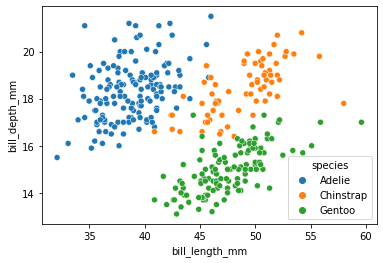

In [30]:
sns.scatterplot(data=dfp2, x="bill_length_mm", y="bill_depth_mm", hue="species")

<AxesSubplot:xlabel='body_mass_g', ylabel='flipper_length_mm'>

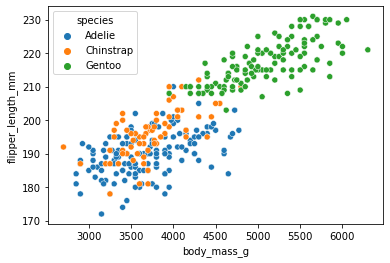

In [31]:
sns.scatterplot(data=dfp2, x="body_mass_g", y="flipper_length_mm", hue="species")

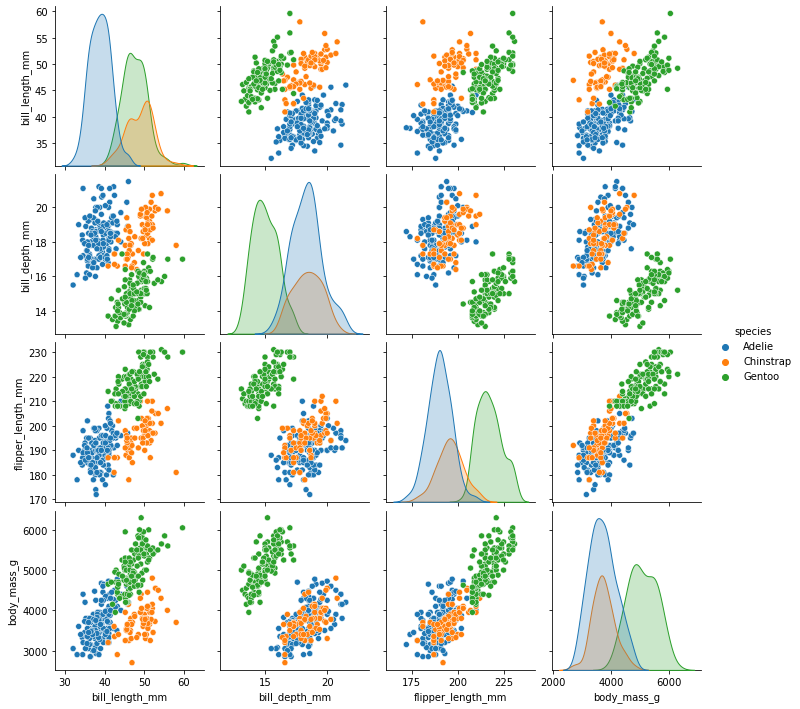

In [32]:
sns.pairplot(dfp2, hue='species')

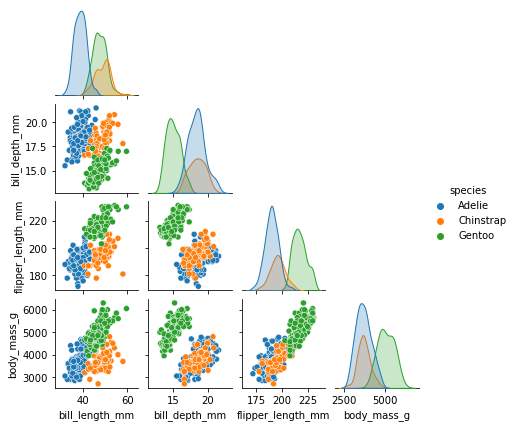

In [33]:
# lots of options for the above. See
# https://seaborn.pydata.org/generated/seaborn.pairplot.html
sns.pairplot(dfp2, corner=True, hue='species', height=1.5)

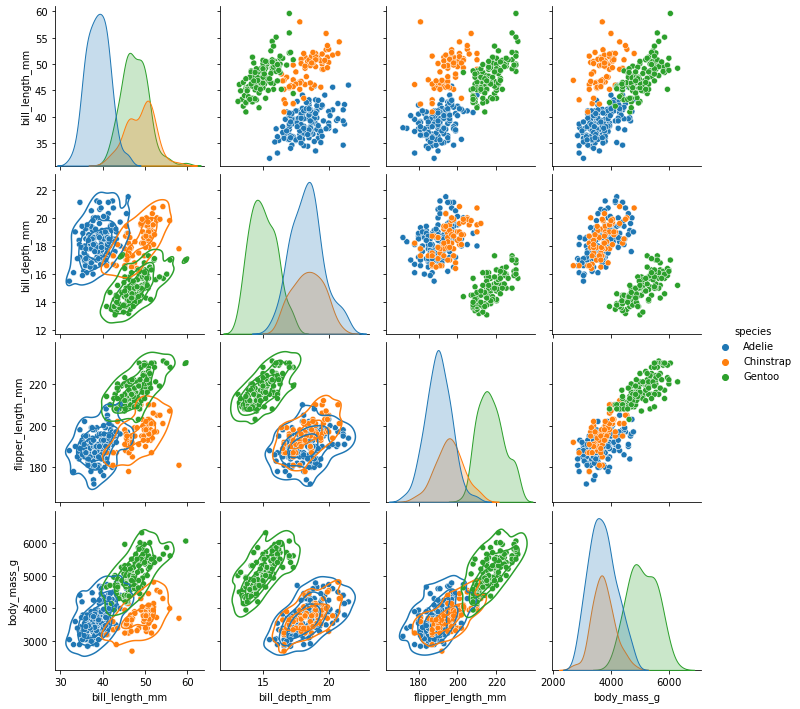

In [34]:
g = sns.pairplot(dfp2, diag_kind="kde", hue='species')
g.map_lower(sns.kdeplot, levels=4, color=".2")

The setting we assume at the outset is that we have a 'training set' of data consisting of 
$(x,y)$ pairs. 

Penguins

Use MNIST later on.

Need to do decision boundary

Need to comment on high norm choice in high dimensions



# extracting and plotting in `matplotlib`

We'll use this one

In [35]:
dfp2.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [36]:
dfp2.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
328,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
329,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
330,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
331,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
332,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,Male


<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

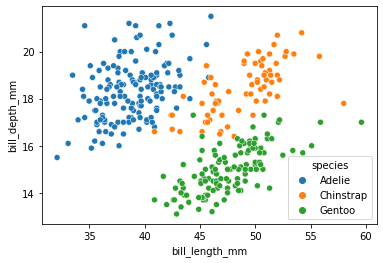

In [37]:
sns.scatterplot(data=dfp2, x="bill_length_mm", y="bill_depth_mm", hue="species")

In [38]:
dfp2['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [39]:
dfA = dfp2.loc[dfp2['species'] == 'Adelie']
dfC = dfp2.loc[dfp2['species'] == 'Chinstrap']
dfG = dfp2.loc[dfp2['species'] == 'Gentoo']

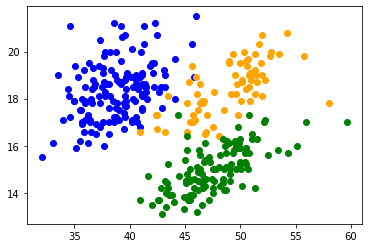

In [40]:
blA=np.array(dfA['bill_length_mm'].tolist())
bdA=np.array(dfA['bill_depth_mm'].tolist())
plt.scatter(blA,bdA,color='blue')

blC=np.array(dfC['bill_length_mm'].tolist())
bdC=np.array(dfC['bill_depth_mm'].tolist())
plt.scatter(blC,bdC,color='orange')

blG=np.array(dfG['bill_length_mm'].tolist())
bdG=np.array(dfG['bill_depth_mm'].tolist())
plt.scatter(blG,bdG,color='green')

In [41]:
dfA.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,146.000000,146.000000,146.000000,146.000000
mean,38.823973,18.347260,190.102740,3706.164384
std,2.662597,1.219338,6.521825,458.620135
min,32.100000,15.500000,172.000000,2850.000000
25%,36.725000,17.500000,186.000000,3362.500000
50%,38.850000,18.400000,190.000000,3700.000000
75%,40.775000,19.000000,195.000000,4000.000000
max,46.000000,21.500000,210.000000,4775.000000


In [42]:
blA

array([39.1, 39.5, 40.3, 36.7, 39.3, 38.9, 39.2, 41.1, 38.6, 34.6, 36.6,
       38.7, 42.5, 34.4, 46. , 37.8, 37.7, 35.9, 38.2, 38.8, 35.3, 40.6,
       40.5, 37.9, 40.5, 39.5, 37.2, 39.5, 40.9, 36.4, 39.2, 38.8, 42.2,
       37.6, 39.8, 36.5, 40.8, 36. , 44.1, 37. , 39.6, 41.1, 36. , 42.3,
       39.6, 40.1, 35. , 42. , 34.5, 41.4, 39. , 40.6, 36.5, 37.6, 35.7,
       41.3, 37.6, 41.1, 36.4, 41.6, 35.5, 41.1, 35.9, 41.8, 33.5, 39.7,
       39.6, 45.8, 35.5, 42.8, 40.9, 37.2, 36.2, 42.1, 34.6, 42.9, 36.7,
       35.1, 37.3, 41.3, 36.3, 36.9, 38.3, 38.9, 35.7, 41.1, 34. , 39.6,
       36.2, 40.8, 38.1, 40.3, 33.1, 43.2, 35. , 41. , 37.7, 37.8, 37.9,
       39.7, 38.6, 38.2, 38.1, 43.2, 38.1, 45.6, 39.7, 42.2, 39.6, 42.7,
       38.6, 37.3, 35.7, 41.1, 36.2, 37.7, 40.2, 41.4, 35.2, 40.6, 38.8,
       41.5, 39. , 44.1, 38.5, 43.1, 36.8, 37.5, 38.1, 41.1, 35.6, 40.2,
       37. , 39.7, 40.2, 40.6, 32.1, 40.7, 37.3, 39. , 39.2, 36.6, 36. ,
       37.8, 36. , 41.5])

In [43]:
blA[:-5]

array([39.1, 39.5, 40.3, 36.7, 39.3, 38.9, 39.2, 41.1, 38.6, 34.6, 36.6,
       38.7, 42.5, 34.4, 46. , 37.8, 37.7, 35.9, 38.2, 38.8, 35.3, 40.6,
       40.5, 37.9, 40.5, 39.5, 37.2, 39.5, 40.9, 36.4, 39.2, 38.8, 42.2,
       37.6, 39.8, 36.5, 40.8, 36. , 44.1, 37. , 39.6, 41.1, 36. , 42.3,
       39.6, 40.1, 35. , 42. , 34.5, 41.4, 39. , 40.6, 36.5, 37.6, 35.7,
       41.3, 37.6, 41.1, 36.4, 41.6, 35.5, 41.1, 35.9, 41.8, 33.5, 39.7,
       39.6, 45.8, 35.5, 42.8, 40.9, 37.2, 36.2, 42.1, 34.6, 42.9, 36.7,
       35.1, 37.3, 41.3, 36.3, 36.9, 38.3, 38.9, 35.7, 41.1, 34. , 39.6,
       36.2, 40.8, 38.1, 40.3, 33.1, 43.2, 35. , 41. , 37.7, 37.8, 37.9,
       39.7, 38.6, 38.2, 38.1, 43.2, 38.1, 45.6, 39.7, 42.2, 39.6, 42.7,
       38.6, 37.3, 35.7, 41.1, 36.2, 37.7, 40.2, 41.4, 35.2, 40.6, 38.8,
       41.5, 39. , 44.1, 38.5, 43.1, 36.8, 37.5, 38.1, 41.1, 35.6, 40.2,
       37. , 39.7, 40.2, 40.6, 32.1, 40.7, 37.3, 39. , 39.2])

In [44]:
print('number of rows in dfA = ', dfA.shape[0], '; in dfC = ', dfC.shape[0], ' and in dfG = ', dfG.shape[0])

number of rows in dfA =  146 ; in dfC =  68  and in dfG =  119


Now determine how many of each species there are

In [45]:
rA, _ = dfA.shape; rC, _ = dfC.shape; rG, _ = dfG.shape
print('number of rows in dfA = ', rA, '; in dfC = ', rC, ' and in dfG = ', rG)

number of rows in dfA =  146 ; in dfC =  68  and in dfG =  119


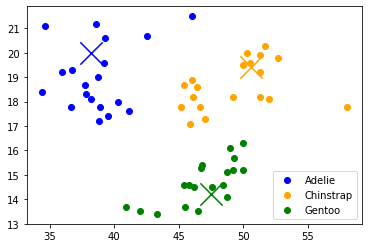

In [46]:
plt.scatter(blA[1:20],bdA[1:20],color='blue')
#plt.pause(2)
#time.sleep(2)
plt.scatter(blC[1:20],bdC[1:20],color='orange')
#time.sleep(2)
plt.scatter(blG[1:20],bdG[1:20],color='green')
plt.legend(['Adelie', 'Chinstrap', 'Gentoo'],loc='lower right')

indx = -45
plt.scatter(blA[indx],bdA[indx],color='blue', marker='x', s=500)
plt.scatter(blC[indx],bdC[indx],color='orange', marker='x', s=500)
plt.scatter(blG[indx],bdG[indx],color='green', marker='x', s=500)

# $k$-NN's - developing intuition


Want min 
$$
\Vert\boldsymbol{x}^* - \boldsymbol{x}_i\Vert^2
$$


Standard imports

These are from *Machine Learning with Python Tutorial*, by Bernd Klein at <https://python-course.eu/python_and_machine_learning.pdf>

```
from mpl_toolkits.mplot3d import Axes3D
colours = ("r", "b")
X = []
for iclass in range(3):
X.append([[], [], []])
for i in range(len(learn_data)):
if learn_labels[i] == iclass:
X[iclass][0].append(learn_data[i][0])
X[iclass][1].append(learn_data[i][1])
X[iclass][2].append(sum(learn_data[i][2:]))
colours = ("r", "g", "y")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for iclass in range(3):
ax.scatter(X[iclass][0], X[iclass][1], X[iclass][2], c=colours[iclass])
plt.show()
```

# NOTE: 

This material below for the iris data set has been copied elsewhere. This
code can be used a template for the k-NN for penguins.

The next two are not needed - work with seaborn.

*not needed*

```
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
#iris_df = dfp
print(iris.target)
pd.plotting.scatter_matrix(iris_df, c=iris.target, figsize=(12, 12) );
```

*not needed*
```
iris_df.head()
```

Code adapted from *Machine Learning with Python, tutorialspoint*
<https://www.tutorialspoint.com/machine_learning_with_python/index.htm> or <https://www.tutorialspoint.com/machine_learning_with_python/machine_learning_with_python_tutorial.pdf>

In [47]:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
#headernames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
#dataset = pd.read_csv(path, names=headernames)
#dataset.head()
dataset = sns.load_dataset('iris') 
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [48]:
# M A K E   the change here

#dataset = sns.load_dataset('penguins')
dataset = dfp2
dataset.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [49]:
dataset.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
328,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
329,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
330,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
331,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
332,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,Male


In [50]:
#X = dataset.iloc[:, :-1].values
#y = dataset.iloc[:, 4].values

Fit the model using the Manhattan metric:
$\Vert\boldsymbol{x}^* - \boldsymbol{x}_i\Vert_1$, 
and then plot the confusion matrix and performance data. 

In [51]:
X = dataset.iloc[:, 2:6].values
y = dataset.iloc[:, 0].values
#print(X[0:4,:])
#print(y[0:4])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=2, p=1)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2, p=1)

In [54]:
y_pred = classifier.predict(X_test)

In [55]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:"); print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",); print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:", result2)

Confusion Matrix:
[[63  0  0]
 [ 5 22  0]
 [ 0  0 44]]
Classification Report:
              precision    recall  f1-score   support

      Adelie       0.93      1.00      0.96        63
   Chinstrap       1.00      0.81      0.90        27
      Gentoo       1.00      1.00      1.00        44

    accuracy                           0.96       134
   macro avg       0.98      0.94      0.95       134
weighted avg       0.97      0.96      0.96       134

Accuracy: 0.9626865671641791


## $k$-NN for regression

This technique can also be used for regression. See for example
<https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/>
for a demonstration of this using the California house data set
????????????

# Technical Notes

This originated from
<https://stackoverflow.com/questions/38540326/save-html-of-a-jupyter-notebook-from-within-the-notebook>

These lines create a back up of the notebook. They can be ignored.

At some point this is better as a bash script outside of the notebook


In [56]:
%%bash
NBROOTNAME='3_knn'
OUTPUTTING=1

if [ $OUTPUTTING -eq 1 ]; then
  jupyter nbconvert --to html $NBROOTNAME.ipynb
  cp $NBROOTNAME.html ../backups/$(date +"%m_%d_%Y-%H%M%S")_$NBROOTNAME.html
  mv -f $NBROOTNAME.html ./formats/html/

  jupyter nbconvert --to pdf $NBROOTNAME.ipynb
  cp $NBROOTNAME.pdf ../backups/$(date +"%m_%d_%Y-%H%M%S")_$NBROOTNAME.pdf
  mv -f $NBROOTNAME.pdf ./formats/pdf/

  jupyter nbconvert --to script $NBROOTNAME.ipynb
  cp $NBROOTNAME.py ../backups/$(date +"%m_%d_%Y-%H%M%S")_$NBROOTNAME.py
  mv -f $NBROOTNAME.py ./formats/py/
else
  echo 'Not Generating html, pdf and py output versions'
fi

[NbConvertApp] Converting notebook 3_knn.ipynb to html
[NbConvertApp] Writing 1914641 bytes to 3_knn.html
[NbConvertApp] Converting notebook 3_knn.ipynb to pdf
[NbConvertApp] Support files will be in 3_knn_files/
[NbConvertApp] Making directory ./3_knn_files
[NbConvertApp] Making directory ./3_knn_files
[NbConvertApp] Making directory ./3_knn_files
[NbConvertApp] Making directory ./3_knn_files
[NbConvertApp] Making directory ./3_knn_files
[NbConvertApp] Making directory ./3_knn_files
[NbConvertApp] Making directory ./3_knn_files
[NbConvertApp] Making directory ./3_knn_files
[NbConvertApp] Making directory ./3_knn_files
[NbConvertApp] Making directory ./3_knn_files
[NbConvertApp] Making directory ./3_knn_files
[NbConvertApp] Making directory ./3_knn_files
[NbConvertApp] Writing 133572 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] W

# title

here is  my equatiomn

$$
-\nabla^2 u = f
$$


In [57]:
print('finished')

finished
